In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.7. Cluster Variable Averages')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.7. Cluster Variable Averages/Output')
cur_date = "032723"

library(readxl)
library(tidyverse)
library(reshape2)
library(tidytext)
library(rcartocolor)
library(MetBrewer)
library(cowplot)
library(scales)

# reading in files
housing_df = data.frame(read_excel("Input/Imputed_Housing_Data_030923.xlsx"))
whp_df = data.frame(read_excel("Input/Imputed_Wildfire_Hazard_030923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
head(housing_df)
head(whp_df)

,GEO_ID,Census_Tract,County,Total_Housing_Units,Housing_Density,Total_Occupied_Housing_Units,Total_Owner_Occupied_Housing_Units,Median_Year_Structure_Built,Owner_Occupied_Housing_Units_Less_than_HPI,Median_House_Value,Median_Gross_Rent,Median_Gross_Rent_Percentage_of_Household_Income
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,2006,31.54848,1757,851,1949,824,149600,614,27.9
2,14000US37001020200,202.00,Alamance,1943,26.03618,1675,881,1961,881,83400,609,31.5
3,14000US37001020300,203.00,Alamance,3254,71.60011,2930,2015,1971,1980,91500,763,37.7
4,14000US37001020400,204.00,Alamance,2590,53.47674,2327,1510,1974,1487,96900,659,34.3
5,14000US37001020501,205.01,Alamance,1435,122.03583,1280,990,1973,932,137400,584,46.7
6,14000US37001020502,205.02,Alamance,1484,471.34609,1275,666,1980,666,73500,672,35.9


,GEO_ID,FIPS,County,Census_Tract,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,14000US37141920201,37141920201,Pender,9202.01,596842.6,715.5177,5,0-20%
2,14000US37141920401,37141920401,Pender,9204.01,596842.6,715.5177,5,0-20%
3,14000US37141920402,37141920402,Pender,9204.02,596842.6,715.5177,5,0-20%
4,14000US37141920403,37141920403,Pender,9204.03,596842.6,715.5177,5,0-20%
5,14000US37141920601,37141920601,Pender,9206.01,596842.6,715.5177,5,0-20%
6,14000US37141990100,37141990100,Pender,9901.00,596842.6,715.5177,5,0-20%


Defining a GEO id to be have an elevated risk of WHP if the data point falls within the 95th percentile. Based on this [ref](https://www.fs.usda.gov/rm/pubs/rmrs_p073/rmrs_p073_060_076.pdf).

In [3]:
high_risk_WHP = quantile(whp_df$Wildfire_Hazard_Potential_Mean, 0.95)[[1]]
high_risk_WHP

[1] 438.9983

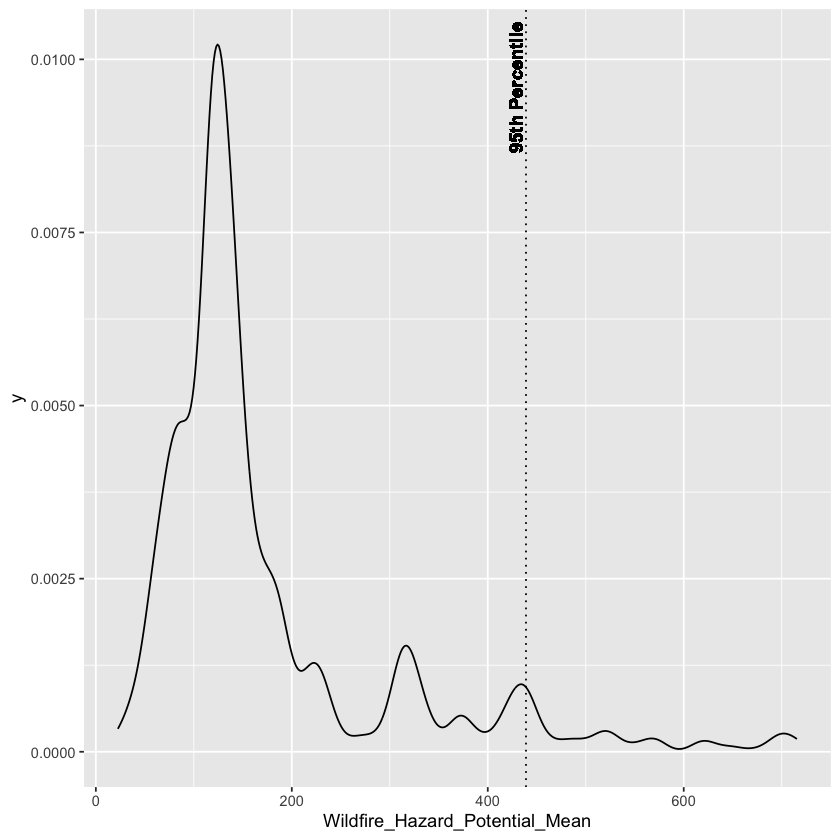

In [4]:
ggplot(whp_df) + 
  geom_density(aes(Wildfire_Hazard_Potential_Mean)) + 
  geom_vline(xintercept = high_risk_WHP, linetype = "dotted") + 
  geom_text(aes(x = high_risk_WHP - 10, label = "95th Percentile", y = 0.0096), angle = 90, fontface = "bold")

In [5]:
# creating 1 df
whp_housing_df = inner_join(whp_df, housing_df)
head(whp_housing_df)

dim(whp_housing_df)

Joining, by = c("GEO_ID", "County", "Census_Tract")


,GEO_ID,FIPS,County,Census_Tract,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Total_Housing_Units,Housing_Density,Total_Occupied_Housing_Units,Total_Owner_Occupied_Housing_Units,Median_Year_Structure_Built,Owner_Occupied_Housing_Units_Less_than_HPI,Median_House_Value,Median_Gross_Rent,Median_Gross_Rent_Percentage_of_Household_Income
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37141920201,37141920201,Pender,9202.01,596842.6,715.5177,5,0-20%,2385,961.7430,1773,1541,1996,1230,202400,821,17.6
2,14000US37141920401,37141920401,Pender,9204.01,596842.6,715.5177,5,0-20%,955,175.7199,752,566,1976,531,106100,712,24.5
3,14000US37141920402,37141920402,Pender,9204.02,596842.6,715.5177,5,0-20%,1069,821.6787,1011,694,1980,677,104300,708,34.3
4,14000US37141920403,37141920403,Pender,9204.03,596842.6,715.5177,5,0-20%,1505,891.3438,1366,1101,1989,930,152800,801,50.0
5,14000US37141920601,37141920601,Pender,9206.01,596842.6,715.5177,5,0-20%,1226,875.4509,1171,1102,1990,991,93700,518,50.0
6,14000US37153970400,37153970400,Richmond,9704.00,307147.7,704.1077,5,0-20%,1784,662.7341,1512,1278,1972,1221,89900,517,45.3


[1] 2027   17

In [6]:
# filtering for geo id's that are at high risk WHP
high_risk_df = whp_housing_df %>%
    filter(Wildfire_Hazard_Potential_Mean > high_risk_WHP)

dim(high_risk_df)

[1] 104  17

In [10]:
# determinig the number of housing units in high risk GEO ids
high_risk_df %>%
    summarize(Total_high_risk_Housing_Units = sum(Total_Housing_Units))

Total_high_risk_Housing_Units
<dbl>
208596


In [9]:
# determinig the value of all the housing units in high risk GEO ids
high_risk_df %>%
    mutate(Total_Housing_Value_of_GEO_id = Total_Housing_Units * Median_House_Value) %>%
    summarize(Total_NC_high_risk_Housing_Value = dollar(sum(Total_Housing_Value_of_GEO_id)))

Total_NC_high_risk_Housing_Value
<chr>
"$31,034,344,072"


Over 200,000 homes are located in regions with elevated risk to future wildfire events